<h3><전력소비량 그래프 시각화 test></h3>

In [11]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import re

In [12]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

In [13]:
df_con1 = pd.read_csv("201001_202112_월별_시도별_전력사용량.csv")
df_con1

,Unnamed: 0,연도,시도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,0,2010,강원도,1480180,1382020,1308429,1317499,1185530,1114450,1055938,1088438,1058865,1116695,1297575,1442404
1,1,2010,경기도,8725482,8341902,7574084,7727001,7156767,7152029,7589292,7961584,7659696,6868326,7866013,8452695
2,2,2010,경상남도,2922775,2719682,2648326,2665253,2453568,2429359,2550149,2600386,2594082,2428098,2623317,2914222
3,3,2010,경상북도,3743904,3471888,3484251,3454660,3321968,3301601,3344445,3428974,3394857,3370268,3498295,3773932
4,4,2010,광주광역시,712924,682498,632293,642843,603935,605548,667137,697066,692544,605233,632721,685316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,2021,전라남도,2844658,2738900,2724005,2670493,2722103,2648105,2856350,3073050,2836764,2726495,2679718,2966246
200,200,2021,전라북도,1997136,1830234,1771153,1725471,1667691,1697453,1803462,1923328,1791056,1679464,1736069,1864342
201,201,2021,제주특별자치도,518258,503324,450805,461823,430958,437447,486838,544310,495549,446949,438179,473291
202,202,2021,충청남도,4434196,4039445,4077387,3876573,3877528,3770865,4137216,4257399,3978322,3855222,4108694,4388778


<h3>서울특별시의 경우</h3>

In [14]:
data1 = df_con1[df_con1["시도"] == "서울특별시"]
data2 = data1.T # DataFrame의 행렬을 바꿔줌
data2

,8,25,42,59,76,93,110,127,144,161,178,195
Unnamed: 0,8,25,42,59,76,93,110,127,144,161,178,195
연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
시도,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
1월,4398183,4562632,4349335,4486310,4155574,4281117,4151770,4139967,4477102,4416889,4197026,4400410
2월,4168168,4264449,4298788,4189413,3974971,4023566,4174917,4166700,4469940,4127699,4037392,4134045
3월,3624186,3736362,3837539,3652776,3547923,3592926,3729909,3649111,3657824,3582654,3657444,3550751
4월,3719082,3682652,3695515,3638393,3466188,3512071,3457927,3470755,3503967,3591552,3410967,3449257
5월,3426951,3425703,3483656,3439856,3305028,3324249,3340823,3290791,3366946,3419987,3295839,3324763
6월,3729030,3713716,3736558,3706936,3649218,3637371,3715673,3621612,3686242,3676047,3730294,3701621
7월,4219590,4049595,4075847,4099931,4072242,3982172,4101888,4273771,4260544,4146986,4074026,4406553


In [15]:
data3 = data2.reset_index() # reset_index()로 index를 생성
data4 = data3.drop([0,1,2]) # 0부터 2번 행은 사용하지 않으므로 drop()을 사용하여 삭제

data4.columns

Index(['index', 8, 25, 42, 59, 76, 93, 110, 127, 144, 161, 178, 195], dtype='object')

In [16]:
# '8'이라는 column에 '25' 이후의 데이터를 세로로 이어붙이기(melt 사용)
data5 = pd.melt(data4,
                    id_vars=['index'],
                    value_vars=[8, 25, 42, 59, 76, 93, 110, 127, 144, 161, 178, 195])
data5

,index,variable,value
0,1월,8,4398183
1,2월,8,4168168
2,3월,8,3624186
3,4월,8,3719082
4,5월,8,3426951
...,...,...,...
139,8월,195,5103868
140,9월,195,4145083
141,10월,195,3578614
142,11월,195,3537141


In [17]:
# variable column 삭제(default : axis=0, 행을 제거하는게 기본값이나 1을 입력하면 열을 삭제할 수 있음)
data6 = data5.drop('variable',axis=1) 
data6

,index,value
0,1월,4398183
1,2월,4168168
2,3월,3624186
3,4월,3719082
4,5월,3426951
...,...,...
139,8월,5103868
140,9월,4145083
141,10월,3578614
142,11월,3537141


In [18]:
# 각 column의 이름을 '기간', '전력소비량'으로 설정
data7 = data6.rename(columns = {'index' : '기간', 'value' : '전력소비량'}, inplace = False)
data8 = data7.reset_index()
data9 = data8.astype({"index" : "object"})
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   144 non-null    object
 1   기간      144 non-null    object
 2   전력소비량   144 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


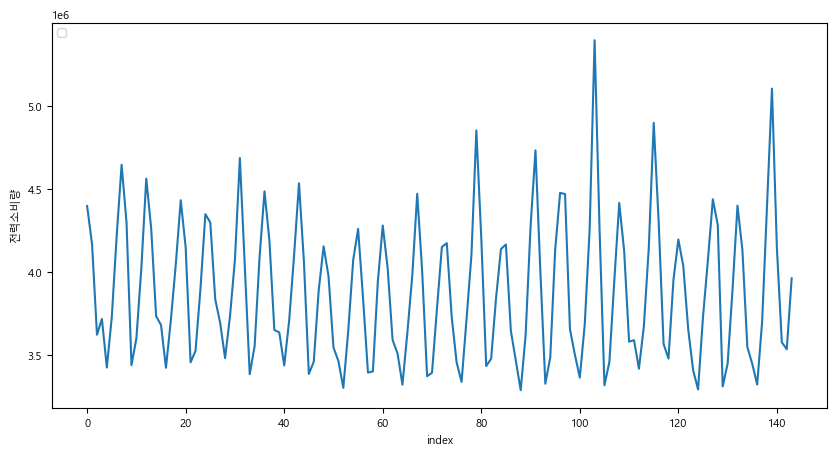

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data9,x='index',y='전력소비량')
plt.legend(bbox_to_anchor=(0,1),loc=2)